In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import NeuralNets as NN_
#import NeuralNets_cython as NN
import pytorch_NN as PyNN
import pandas as pd

In [2]:
fashion_minst = pd.read_csv("mnist_train.csv").to_numpy()
yactual_uncleaned = fashion_minst[:,0:1].flatten()
xactual = fashion_minst[:,1:]/255
yactual = np.zeros((60000,10))
for i,y in enumerate(yactual_uncleaned):
    yactual_temp = np.zeros(10)
    yactual_temp[y] = 1
    yactual[i] = yactual_temp
xactual = torch.from_numpy(xactual).to(dtype = torch.float32)
yactual = torch.from_numpy(yactual).to(dtype = torch.float32)


In [3]:
data_set  = PyNN.CustomDataset(xactual,yactual)

## Split into train/test did not use this..
train,test = random_split(data_set,[int(1 * len(data_set)),int(0.0 * len(data_set))])
num_epochs = 500
dataset_size = 60000
batch_size = 200
MSE_history = []
mse_list = np.zeros(num_epochs)
data_loader_train = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [4]:
input_dim = 784
output_dim = 10
num_hidden_layers = 3
nodes_per_layer = 500
minibatch_sz = batch_size
model = PyNN.NeuralNetwork(input_dim, nodes_per_layer, output_dim) # Create model
optimizer = optim.SGD(model.parameters(),lr=.001)
error_list = []
percent = [1]
## MY IMPLEMENTATION
regular = NN_.FullyConnected(input_dim,output_dim,nodes_per_layer,num_hidden_layers,minibatch_sz,activation_fcn="SiLU",optimizer="SGD",classifier=True,use_tensors=False) 
tensor = NN_.FullyConnected(input_dim,output_dim,nodes_per_layer,num_hidden_layers,minibatch_sz,activation_fcn="SiLU",optimizer="SGD",classifier=True,use_tensors=True)   
tensor.parameters = regular.parameters
#test = NN_.load_state("checkpoints/epoch10.pkl")

In [5]:
CEL = 0
for epoch in range(0, num_epochs-1):
    count = 0
    #if epoch % 2 == 0:
        #NN_.save_state(test,"epoch"+str(epoch))
    
    for batch_x, batch_y in data_loader_train:
        print("[epoch: "+str(epoch)+" Batch: "+str(count)+" ]  -----> Loss: "+str(CEL)+ "; Percent correct: "+str(percent[-1]))
        #output = model(batch_x)
        #criterion = nn.CrossEntropyLoss()
        #loss = criterion(output, batch_y)

        # Backward pass and optimization
        #optimizer.zero_grad()
        #loss.backward()
        #optimizer.step()

        # Get MSE
        #error_list.append(loss.item())
        
        #print(batch_x.shape)
        #print(batch_x.numpy().shape)
        #print(test.parameters["weights_in"].shape)
        #y_pred = regular.forward(batch_x.numpy())
        y_pred2 = tensor.forward(batch_x.numpy()).squeeze().T

        #print(np.linalg.norm(regular.z_out - tensor.z_out))
       

        #print(np.linalg.norm(y_pred-y_pred2))
        #print(y_pred.shape,batch_y.numpy().shape)
        tensor.gradient(y_pred2,batch_y.numpy(),batch_x.numpy())
        tensor.updateWeights(lr=.001,alg="ADAM",clip_gradients = False)
        CEL = np.around(-np.mean(batch_y.numpy() * np.log(np.clip(y_pred2, 1e-15, 1 - 1e-15))),decimals=4)

        #MSE_history.append(CEL)
        #test.mse_history.append(CEL)
        #print(np.argmax(output.detach().numpy()[0]),np.argmax(batch_y.detach().numpy()[0]))
        count+=1
        #if count%batch_size//10==0:
        #    percent.append(NN_.validate_data(output.detach().numpy(),batch_y.detach().numpy()))
        percent.append(NN_.validate_data(y_pred2,batch_y.detach().numpy()))
       # print("percent error: ",percent[-1])
    #plt.clf()
   

    

[epoch: 0 Batch: 0 ]  -----> Loss: 0; Percent correct: 1
[epoch: 0 Batch: 1 ]  -----> Loss: 0.2313; Percent correct: 8.0
[epoch: 0 Batch: 2 ]  -----> Loss: 0.2312; Percent correct: 6.0
[epoch: 0 Batch: 3 ]  -----> Loss: 0.2313; Percent correct: 10.0
[epoch: 0 Batch: 4 ]  -----> Loss: 0.2314; Percent correct: 10.0
[epoch: 0 Batch: 5 ]  -----> Loss: 0.2318; Percent correct: 9.0
[epoch: 0 Batch: 6 ]  -----> Loss: 0.2305; Percent correct: 7.000000000000001
[epoch: 0 Batch: 7 ]  -----> Loss: 0.2316; Percent correct: 7.5
[epoch: 0 Batch: 8 ]  -----> Loss: 0.2313; Percent correct: 12.0
[epoch: 0 Batch: 9 ]  -----> Loss: 0.2322; Percent correct: 4.5
[epoch: 0 Batch: 10 ]  -----> Loss: 0.2315; Percent correct: 8.5
[epoch: 0 Batch: 11 ]  -----> Loss: 0.2314; Percent correct: 9.0
[epoch: 0 Batch: 12 ]  -----> Loss: 0.2298; Percent correct: 13.0
[epoch: 0 Batch: 13 ]  -----> Loss: 0.2316; Percent correct: 9.0
[epoch: 0 Batch: 14 ]  -----> Loss: 0.2323; Percent correct: 8.0
[epoch: 0 Batch: 15 ]  -

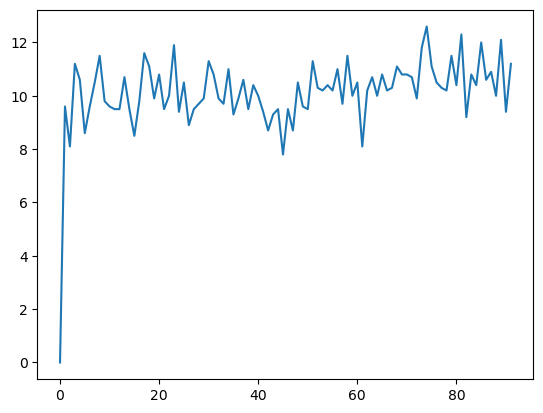

In [ ]:
#print(test.mean)
#x = np.arange(len(test.mse_history))
#plt.semilogy(x,test.mse_history/test.mse_history[0],"-")
#NN_.save_state(test,"epoch"+str(100))
#plt.semilogy(np.array(error_list)/error_list[0])
plt.plot(np.array(percent))

In [ ]:
np.linalg.norm(test.gradients["weights"])
print(epoch)

In [ ]:

input_dim = 2
output_dim = 1
hidden_dim = 20
num_epochs = 10000
dataset_size = 10000
batch_size = 1000

model = PyNN.NeuralNetwork(input_dim, hidden_dim, output_dim) # Create model
optimizer = optim.Adam(model.parameters(),lr=.001) #Define optimizer

## Define functions on which to do NLLS
x1_train, x2_train = PyNN.functions.generate_data([-5,5],[-5,5],dataset_size)
fcn = PyNN.functions.rosenbrock_noisy
y_train = torch.from_numpy(fcn(x1_train,x2_train)).to(torch.float32).unsqueeze(1)

#y_train = torch.from_numpy(np.array(np.cos(x1_train)+np.sin(x2_train))).to(torch.float32).unsqueeze(1)
x_train = torch.from_numpy(np.array([x1_train,x2_train]).transpose()).to(torch.float32)
data_set  = PyNN.CustomDataset(x_train,y_train)

## Split into train/test did not use this..
train,test = random_split(data_set,[int(1 * len(data_set)),int(0.0 * len(data_set))])
mse_list = np.zeros(num_epochs)
data_loader_train = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)



In [ ]:
input_dim = 2
output_dim = 1
num_hidden_layers = 2
nodes_per_layer = 20
minibatch_sz = batch_size

test = NN_.FullyConnected(input_dim,output_dim,nodes_per_layer,num_hidden_layers,minibatch_sz,activation_fcn="ReLU",optimizer="SGD")  




In [ ]:
#for param in model.parameters():
   # print(param)
MSE_history = []
mse_list_ = []

In [ ]:
for epoch in range(0, num_epochs-1):
    for batch_x, batch_y in data_loader_train:
        
        ## Pytorch
        
        # Forward pass
        #output = model(batch_x)
        
        # Compute the loss
        #criterion = nn.MSELoss()
        #loss = criterion(output, batch_y)

        # Backward pass and optimization
        #optimizer.zero_grad()
        #loss.backward()
        #optimizer.step()

        # Get MSE
        #mse_list_.append(loss.item())

        # My implementation
        y_pred = test.forward(batch_x.numpy())
        
        test.gradient(y_pred,batch_y.numpy(),batch_x.numpy())
        test.updateWeights(lr=.0005,alg="ADAM")
        
    
        
    
       
        MSE_history.append(np.mean((y_pred.flatten()-batch_y.numpy().flatten())**2))
      

In [ ]:
plt.semilogy(MSE_history/MSE_history[0])
#plt.semilogy(np.array(mse_list_)/mse_list_[0])
plt.legend(["Mine","pytorch"])